In [56]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df["sex"]


0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [8]:
df["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [9]:
df["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [10]:
#using get dummies function to convert categorical variables into numerical one
#one hot encoding
pd.get_dummies(df)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [12]:
df_one_hot=pd.get_dummies(df)
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [14]:
X=df_one_hot.drop("charges",axis=1)
y=df_one_hot["charges"]

In [15]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [16]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [40]:
#building a model using tensorflow
tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])
# insurance_model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8708.2939 - mae: 8708.2939
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7853.4927 - mae: 7853.4927
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7530.7212 - mae: 7530.7212
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7814.0967 - mae: 7814.0967
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.9868 - mae: 7678.9868
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7573.8657 - mae: 7573.8657
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7590.6523 - mae: 7590.6523
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7726.2056 - mae: 7726.2056
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7535.9639 - mae: 7535.9639
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7648.7231 - mae: 7648.7231

34/34 [==============================] - 0s 1ms/step - loss: 7266.5679 - mae: 7266.5679
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 7587.8921 - mae: 7587.8921
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 7193.7915 - mae: 7193.7915
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 7345.0664 - mae: 7345.0664
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 7309.2837 - mae: 7309.2837
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 7218.0752 - mae: 7218.0752
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 7229.6689 - mae: 7229.6689
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.1147 - mae: 7520.1147
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 7059.5664 - mae: 7059.5664
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 7273.8594 - mae: 7273.8594
Epo

In [41]:
# accuracy is not good at this point
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7630.9478 - mae: 7630.9478


[7630.94775390625, 7630.94775390625]

In [32]:
y_train.mean()

13346.089736364489

In [46]:
#rebuilding the model with a higher accuracy
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])
# insurance_model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
insurance_model_2.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 8647.6650 - mae: 8647.6650
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 7853.3804 - mae: 7853.3804
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 7550.2495 - mae: 7550.2495
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7782.2227 - mae: 7782.2227
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7619.7168 - mae: 7619.7168
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7636.0674 - mae: 7636.0674
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7522.8145 - mae: 7522.8145
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7692.4810 - mae: 7692.4810
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7610.6660 - mae: 7610.6660
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7707.4648 - mae: 7707.4648

34/34 [==============================] - 0s 1ms/step - loss: 7068.4258 - mae: 7068.4258
Epoch 83/200
34/34 [==============================] - 0s 1ms/step - loss: 7368.0117 - mae: 7368.0117
Epoch 84/200
34/34 [==============================] - 0s 1ms/step - loss: 7445.7578 - mae: 7445.7578
Epoch 85/200
34/34 [==============================] - 0s 1ms/step - loss: 7420.1968 - mae: 7420.1968
Epoch 86/200
34/34 [==============================] - 0s 1ms/step - loss: 7336.4775 - mae: 7336.4775
Epoch 87/200
34/34 [==============================] - 0s 1ms/step - loss: 7121.8037 - mae: 7121.8037
Epoch 88/200
34/34 [==============================] - 0s 1ms/step - loss: 7175.0537 - mae: 7175.0537
Epoch 89/200
34/34 [==============================] - 0s 1ms/step - loss: 7250.5010 - mae: 7250.5010
Epoch 90/200
34/34 [==============================] - 0s 1ms/step - loss: 7171.5342 - mae: 7171.5342
Epoch 91/200
34/34 [==============================] - 0s 1ms/step - loss: 7226.2930 - mae: 7226.2930
Epo

34/34 [==============================] - 0s 1ms/step - loss: 7213.1978 - mae: 7213.1978
Epoch 163/200
34/34 [==============================] - 0s 1ms/step - loss: 6960.1455 - mae: 6960.1455
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 6980.1816 - mae: 6980.1816
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 7195.4976 - mae: 7195.4976
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 7094.4277 - mae: 7094.4277
Epoch 167/200
34/34 [==============================] - 0s 1ms/step - loss: 6747.4355 - mae: 6747.4355
Epoch 168/200
34/34 [==============================] - 0s 1ms/step - loss: 7160.7568 - mae: 7160.7568
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 7131.5566 - mae: 7131.5566
Epoch 170/200
34/34 [==============================] - 0s 1ms/step - loss: 6959.2944 - mae: 6959.2944
Epoch 171/200
34/34 [==============================] - 0s 1ms/step - loss: 7135.8281 - mae: 7135

In [47]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5835.4321 - mae: 5835.4321


[5835.43212890625, 5835.43212890625]

In [52]:
tf.random.set_seed(42)

insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["mae"])
# insurance_model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13330.5039 - mae: 13330.5039
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13295.6201 - mae: 13295.6201
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13233.2783 - mae: 13233.2783
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13119.0918 - mae: 13119.0918
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 12928.9814 - mae: 12928.9814
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 12635.2402 - mae: 12635.2402
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12210.4873 - mae: 12210.4873
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 11631.3730 - mae: 11631.3730
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 10889.9062 - mae: 10889.9062
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 10052.16

34/34 [==============================] - 0s 1ms/step - loss: 6290.3257 - mae: 6290.3257
Epoch 83/200
34/34 [==============================] - 0s 1ms/step - loss: 6279.5762 - mae: 6279.5762
Epoch 84/200
34/34 [==============================] - 0s 1ms/step - loss: 6268.1016 - mae: 6268.1016
Epoch 85/200
34/34 [==============================] - 0s 1ms/step - loss: 6260.2661 - mae: 6260.2661
Epoch 86/200
34/34 [==============================] - 0s 1ms/step - loss: 6247.7319 - mae: 6247.7319
Epoch 87/200
34/34 [==============================] - 0s 1ms/step - loss: 6237.3276 - mae: 6237.3276
Epoch 88/200
34/34 [==============================] - 0s 1ms/step - loss: 6227.7417 - mae: 6227.7417
Epoch 89/200
34/34 [==============================] - 0s 1ms/step - loss: 6219.4653 - mae: 6219.4653
Epoch 90/200
34/34 [==============================] - 0s 1ms/step - loss: 6207.1572 - mae: 6207.1572
Epoch 91/200
34/34 [==============================] - 0s 1ms/step - loss: 6196.3262 - mae: 6196.3262
Epo

34/34 [==============================] - 0s 1ms/step - loss: 4422.8848 - mae: 4422.8848
Epoch 163/200
34/34 [==============================] - 0s 1ms/step - loss: 4376.0122 - mae: 4376.0122
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 4329.4561 - mae: 4329.4561
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 4287.1475 - mae: 4287.1475
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 4245.7817 - mae: 4245.7817
Epoch 167/200
34/34 [==============================] - 0s 1ms/step - loss: 4196.8960 - mae: 4196.8960
Epoch 168/200
34/34 [==============================] - 0s 1ms/step - loss: 4149.1055 - mae: 4149.1055
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 4101.2861 - mae: 4101.2861
Epoch 170/200
34/34 [==============================] - 0s 1ms/step - loss: 4059.1780 - mae: 4059.1780
Epoch 171/200
34/34 [==============================] - 0s 1ms/step - loss: 4013.8174 - mae: 4013

In [50]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3924.7397 - mae: 3924.7397


[3924.73974609375, 3924.73974609375]

Text(0, 0.5, 'epochs')

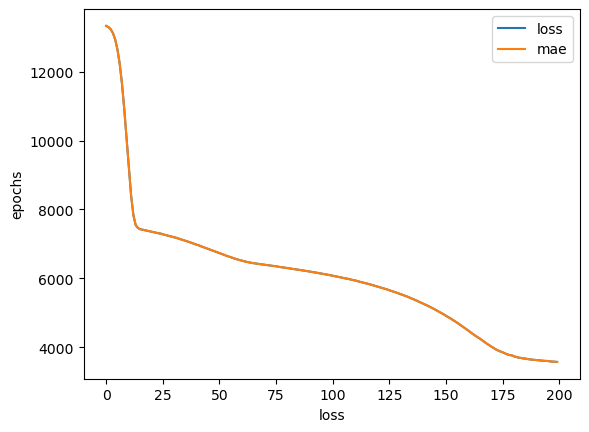

In [53]:
#plotting a history curve(also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

<AxesSubplot:xlabel='age', ylabel='bmi'>

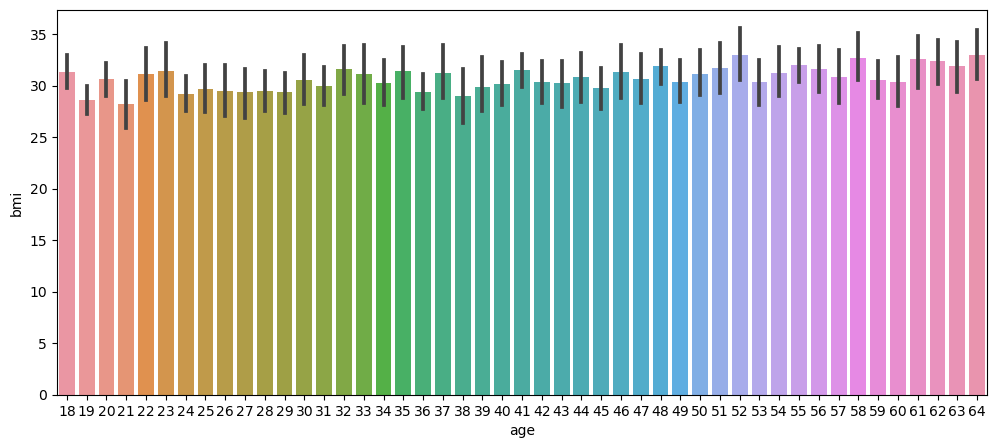

In [66]:
#visualizig Data
plt.figure(figsize=(12,5))
sns.barplot(x='age',y='bmi',data=df)

<AxesSubplot:>

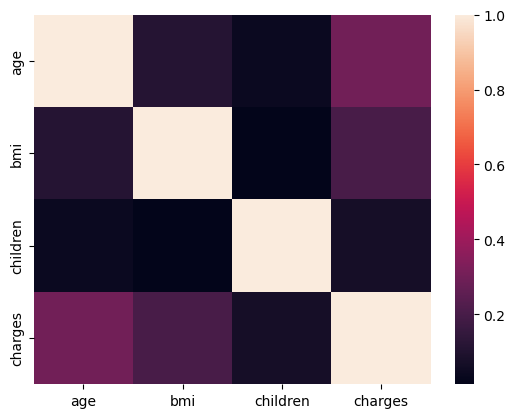

In [67]:
sns.heatmap(df.corr())

In [70]:
#preprocessing data
insurance=pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split

In [74]:
ct=make_column_transformer(
        (MinMaxScaler(),["age","bmi","children"]),#will turn values b/w 0 and 1
        (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

In [75]:
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

In [77]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
#fitting the column transfer to our traiing dat a 
ct.fit(X_train)

# taking the testing data in training data to improve predictions
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [82]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [83]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [87]:
#building our neural network 

tf.random.set_seed(42)

insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
insurance_model_4.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13345.0303 - mae: 13345.0303
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13341.5391 - mae: 13341.5391
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13332.4482 - mae: 13332.4482
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13312.6318 - mae: 13312.6318
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13276.6436 - mae: 13276.6436
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13218.3809 - mae: 13218.3809
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 13131.9697 - mae: 13131.9697
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 13011.0625 - mae: 13011.0625
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12849.1299 - mae: 12849.1299
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 12640.97

34/34 [==============================] - 0s 2ms/step - loss: 4368.3521 - mae: 4368.3521
Epoch 82/200
34/34 [==============================] - 0s 2ms/step - loss: 4286.5161 - mae: 4286.5161
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 4203.4077 - mae: 4203.4077
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 4127.6318 - mae: 4127.6318
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 4056.5471 - mae: 4056.5471
Epoch 86/200
34/34 [==============================] - 0s 1ms/step - loss: 3989.0312 - mae: 3989.0312
Epoch 87/200
34/34 [==============================] - 0s 2ms/step - loss: 3929.9612 - mae: 3929.9612
Epoch 88/200
34/34 [==============================] - 0s 1ms/step - loss: 3875.3694 - mae: 3875.3694
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 3832.7141 - mae: 3832.7141
Epoch 90/200
34/34 [==============================] - 0s 1ms/step - loss: 3795.5198 - mae: 3795.5198
Epo

34/34 [==============================] - 0s 2ms/step - loss: 3361.1018 - mae: 3361.1018
Epoch 162/200
34/34 [==============================] - 0s 1ms/step - loss: 3357.5752 - mae: 3357.5752
Epoch 163/200
34/34 [==============================] - 0s 1ms/step - loss: 3353.1438 - mae: 3353.1438
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 3351.0149 - mae: 3351.0149
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 3346.8491 - mae: 3346.8491
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 3342.9883 - mae: 3342.9883
Epoch 167/200
34/34 [==============================] - 0s 2ms/step - loss: 3339.8716 - mae: 3339.8716
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3336.1975 - mae: 3336.1975
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 3333.6641 - mae: 3333.6641
Epoch 170/200
34/34 [==============================] - 0s 2ms/step - loss: 3330.7117 - mae: 3330

In [88]:
insurance_model_4.evaluate(X_test_normal,y_test)
# insurance_model_3=[3924.73974609375, 3924.73974609375]
# accuracy increased

9/9 [==============================] - 0s 2ms/step - loss: 2934.4988 - mae: 2934.4988


[2934.498779296875, 2934.498779296875]